First Section: Data cleaning and transformation

In [ ]:
import pandas as pd
import numpy as np
import io
from functools import reduce
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['dublinbikes_Julho2021.csv']))
#First code is to upload cvs file.

Saving dublinbikes_Julho2021.csv to dublinbikes_Julho2021.csv


In [ ]:
url='https://drive.google.com/file/d/1FEBsge6LmQydWOGzmfGwJzatu6AFOVC9/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
#Second code is to access content through URL instead of upload cvs file.

In [ ]:
df = df.dropna()
df

,STATION ID,TIME,LAST UPDATED,NAME,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,2.0,01/07/2021 00:00,30/06/2021 23:50,BLESSINGTON STREET,20.0,15.0,5.0,Open,Blessington Street,53.356770,-6.268140
1,2.0,01/07/2021 00:05,01/07/2021 00:00,BLESSINGTON STREET,20.0,15.0,5.0,Open,Blessington Street,53.356770,-6.268140
2,2.0,01/07/2021 00:10,01/07/2021 00:00,BLESSINGTON STREET,20.0,15.0,5.0,Open,Blessington Street,53.356770,-6.268140
3,2.0,01/07/2021 00:15,01/07/2021 00:10,BLESSINGTON STREET,20.0,15.0,5.0,Open,Blessington Street,53.356770,-6.268140
4,2.0,01/07/2021 00:20,01/07/2021 00:10,BLESSINGTON STREET,20.0,15.0,5.0,Open,Blessington Street,53.356770,-6.268140
...,...,...,...,...,...,...,...,...,...,...,...
922312,117.0,31/07/2021 23:35,31/07/2021 23:29,HANOVER QUAY EAST,40.0,38.0,2.0,Open,Hanover Quay East,53.343655,-6.231755
922313,117.0,31/07/2021 23:40,31/07/2021 23:39,HANOVER QUAY EAST,40.0,38.0,2.0,Open,Hanover Quay East,53.343655,-6.231755
922314,117.0,31/07/2021 23:45,31/07/2021 23:39,HANOVER QUAY EAST,40.0,38.0,2.0,Open,Hanover Quay East,53.343655,-6.231755
922315,117.0,31/07/2021 23:50,31/07/2021 23:39,HANOVER QUAY EAST,40.0,38.0,2.0,Open,Hanover Quay East,53.343655,-6.231755


In [ ]:
df.dtypes

In [ ]:
df['STATION ID'].unique() #Verified the numbers of Dublin Bike stations ID

In [ ]:
df['NAME'].unique() #Verified where Dublin Bike stations are located in Dublin City

In [ ]:
df['ADDRESS'].unique() #Verified that table has duplicated values in a column

In [ ]:
df.groupby('STATION ID')[['ADDRESS','NAME']].max() #Verified that table has duplicated values in a column

In [ ]:
#After investigation of duplicate values, droped Name column and Station Id
to_drop_first = ['STATION ID', 
           'NAME']

df.drop(to_drop_first, inplace = True, axis= 1)
df.head()

,TIME,LAST UPDATED,BIKE STANDS,AVAILABLE BIKE STANDS,AVAILABLE BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,01/07/2021 00:00,30/06/2021 23:50,20.0,15.0,5.0,Open,Blessington Street,53.35677,-6.26814
1,01/07/2021 00:05,01/07/2021 00:00,20.0,15.0,5.0,Open,Blessington Street,53.35677,-6.26814
2,01/07/2021 00:10,01/07/2021 00:00,20.0,15.0,5.0,Open,Blessington Street,53.35677,-6.26814
3,01/07/2021 00:15,01/07/2021 00:10,20.0,15.0,5.0,Open,Blessington Street,53.35677,-6.26814
4,01/07/2021 00:20,01/07/2021 00:10,20.0,15.0,5.0,Open,Blessington Street,53.35677,-6.26814


In [ ]:
#For cleaning purpose it was removed Latitude and Longititude as this data is necessary of this research
to_drop_second = ['LATITUDE',
           'LONGITUDE']

df.drop(to_drop_second, inplace = True, axis = 1)

In [ ]:
#Adding Dublin regions that are related to data address
Address_Region= {'Blessington Street': 'D7',
       'Bolton Street': 'D1',
       'Greek Street': 'D7',
       'Charlemont Street': 'D2',
       'Christchurch Place':'D8',
       'High Street':'D8',
       'Custom House Quay': 'D1',
       'Exchequer Street':'D2',
       'Dame Street':'D2',
       'Earlsfort Terrace':'D2',
       'Eccles Street':'D7',
       'Fitzwilliam Square West':'D2',
       'Hardwicke Street':'D1', 
       'Georges Quay':'D2',
       'Golden Lane':'D8',
       'Grantham Street':'D8',
       'Herbert Place':'D2',
       'Leinster Street South':'D2',
       'Townsend Street': 'D2',
       'Custom House':'D1',
       'Cathal Brugha Street': 'D1',
       'Merrion Square East': 'D2', 
       'Merrion Square West': 'D2', 
       'Molesworth Street': 'D2',
       'Mountjoy Square West': 'D1',
       'Ormond Quay Upper': 'D7',
       'Parnell Square North':'D1',
       'Parnell Street': 'D1',
       'Pearse Street':'D2',
       "Princes Street / O'Connell Street":'D2',
       'Portobello Harbour':'D8',
       "St. Stephen's Green East": 'D2',
       "St. Stephen's Green South": 'D2',
       'Talbot Street':'D1',
       'Wilton Terrace':'D2',
       'Jervis Street':'D1',
       'Harcourt Terrace':'D2',
       'Smithfield North':'D7',
       'Portobello Road':'D8',
       'Upper Sherrard Street':'D1',              
       'Deverell Place':'D1',
       'Herbert Street':'D2',
       'Excise Walk':'D1',
       'Guild Street':'D1',
       "George's Lane":'D7',
       'York Street West':'D2',       
       'York Street East':'D2',
       'Newman House':'D2',
       'Clonmel Street':'D2',
       'Hatch Street':'D2',
       'Mount Street Lower':'D2',
       'Grattan Street':'D2',
       "Sir Patrick's Dun":'D2',
       'Denmark Street Great':'D1',
       'North Circular Road':'D1',
       'Hardwicke Place':'D1',
       'Lime Street':'D2',
       'Fenian Street':'D2',
       'Sandwith Street':'D2',
       'Convention Centre':'D1',
       'New Central Bank':'D1',
       'The Point':'D3',
       'Hanover Quay':'D2',
       'Grand Canal Dock':'D2',
       'Kevin Street':'D8',
       'John Street West':'D8', 
       'Francis Street':'D8', 
       'Oliver Bond Street':'D8',
       'James Street':'D8',
       'Market Street South':'D2',
       'Wolfe Tone Street':'D1',
       'Mater Hospital':'D1',
       'Eccles Street East':'D7',
       'St James Hospital (Luas)':'D8',
       'Mount Brown':'D8',
       'Emmet Road':'D8', 
       'Brookfield Road':'D8',
       'Rothe Abbey':'D8',
       'Parkgate Street':'D8',
       'Collins Barracks Museum':'D7',
       'Blackhall Place':'D7',
       'Fitzwilliam Square East':'D2',
       'Benson Street':'D2',
       'South Dock Road':'D4',
       'Heuston Bridge (North)':'D8',
       'Heuston Station (Central)':'D8',
       'Heuston Station (Car Park)':'D8', 
       'Royal Hospital':'D4', 
       'Kilmainham Lane':'D8',
       'Kilmainham Gaol':'D8', 
       'Frederick Street South':'D2',
       'City Quay':'D2',
       'Heuston Bridge (South)':'D8',
       'King Street North':'D7',
       'Western Way':'D7',
       'Grangegorman Lower (South)':'D7',
       'Grangegorman Lower (Central)':'D7',
       'Grangegorman Lower (North)':'D7',
       'Rathdown Road':'D7',
       'Charleville Road':'D6',
       'Avondale Road':'D7',
       'Buckingham Street Lower':'D1', 
       'Phibsborough Road':'D7',
       'Mountjoy Square East':'D1',
       "North Circular Road (O'Connell's)":'D1',
       'Merrion Square South':'D2',
       'Wilton Terrace (Park)':'D2',
       'Killarney Street':'D1',
       'Broadstone':'D7',
       'Hanover Quay East':'D2'}

df['REGION'] = df['ADDRESS'].map(Address_Region)

In [ ]:
#Testing if the chage above worked
df.groupby('ADDRESS')[['REGION']].max()

,REGION
ADDRESS,
Avondale Road,D7
Benson Street,D2
Blackhall Place,D7
Blessington Street,D7
Bolton Street,D1
...,...
Wilton Terrace,D2
Wilton Terrace (Park),D2
Wolfe Tone Street,D1


In [ ]:
#To calculate the number of Dublin Bikes per station, it was subtracted the 'Bike Stands' column with 'Available Bike Stands columns'
df['BIKES AVAILABLE'] = df['BIKE STANDS']-df['AVAILABLE BIKE STANDS']

In [ ]:
#It was splitted Time and Date in two columns
df[['DATE','TIME']] = df['TIME'].str.split(' ', 1, expand=True)


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [ ]:
df['TIME'] = pd.to_datetime(df['TIME'],format= '%H:%M' ).dt.time

In [ ]:
df['DAY OF THE WEEK'] = df['DATE'].dt.day_name()

In [ ]:
#Reindexing columns
df = df.reindex(columns=['DATE', 'DAY OF THE WEEK','TIME', 'BIKE STANDS', 'BIKES AVAILABLE', 'AVAILABLE BIKE STANDS', 'STATUS', 'ADDRESS', 'REGION', 'LAST UPDATED']) 


In [ ]:
df.head()

,DATE,DAY OF THE WEEK,TIME,BIKE STANDS,BIKES AVAILABLE,AVAILABLE BIKE STANDS,STATUS,ADDRESS,REGION,LAST UPDATED
0,2021-01-07,Thursday,00:00:00,20.0,5.0,15.0,Open,Blessington Street,D7,30/06/2021 23:50
1,2021-01-07,Thursday,00:05:00,20.0,5.0,15.0,Open,Blessington Street,D7,01/07/2021 00:00
2,2021-01-07,Thursday,00:10:00,20.0,5.0,15.0,Open,Blessington Street,D7,01/07/2021 00:00
3,2021-01-07,Thursday,00:15:00,20.0,5.0,15.0,Open,Blessington Street,D7,01/07/2021 00:10
4,2021-01-07,Thursday,00:20:00,20.0,5.0,15.0,Open,Blessington Street,D7,01/07/2021 00:10


Second section: Availability per Location of Dublin Bikes

        BIKES AVAILABLE
REGION                 
D1            13.618481
D2            11.088505
D3            15.371756
D4            16.666627
D6            12.754432


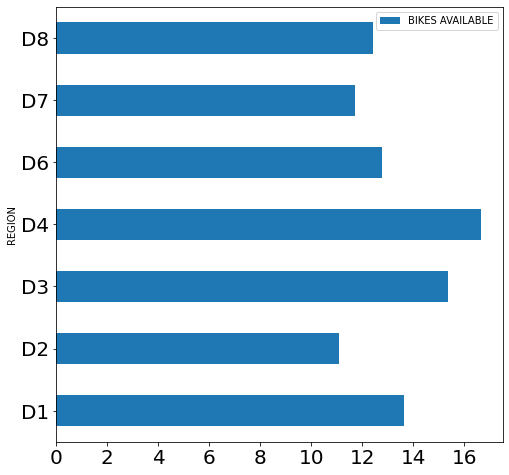

In [ ]:
avaliablity_mean = df.groupby('REGION')[['BIKES AVAILABLE']].mean()

print(avaliablity_mean.head())

avaliablity_mean.plot(kind="barh", fontsize=20, figsize=(8, 8)) #Mean of the bikes availables in Dublin


        BIKES AVAILABLE
REGION                 
D1                 14.0
D2                  0.0
D3                 10.0
D4                 14.0
D6                 12.0
D7                  8.0
D8                 13.0


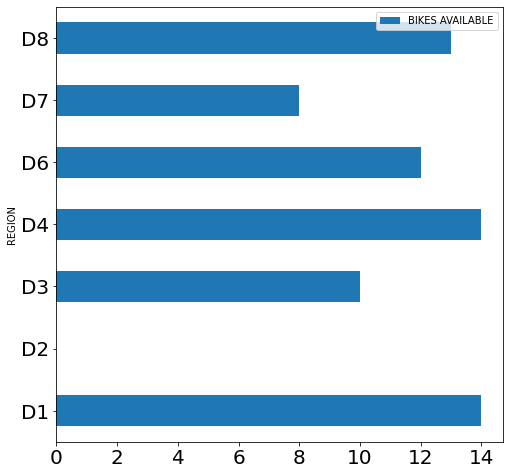

In [ ]:
mode_avaliability = df.groupby('REGION')[['BIKES AVAILABLE']].agg(pd.Series.mode)# Frequency of bike available per region

print(mode_avaliability)

mode_avaliability.plot(kind="barh", fontsize=20, figsize=(8, 8))

       REGION  BIKES AVAILABLE
0          D7              5.0
1          D7              5.0
2          D7              5.0
3          D7              5.0
4          D7              5.0
...       ...              ...
922312     D2              2.0
922313     D2              2.0
922314     D2              2.0
922315     D2              2.0
922316     D2              2.0

[922317 rows x 2 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff1aeba5e50>]],
      dtype=object)

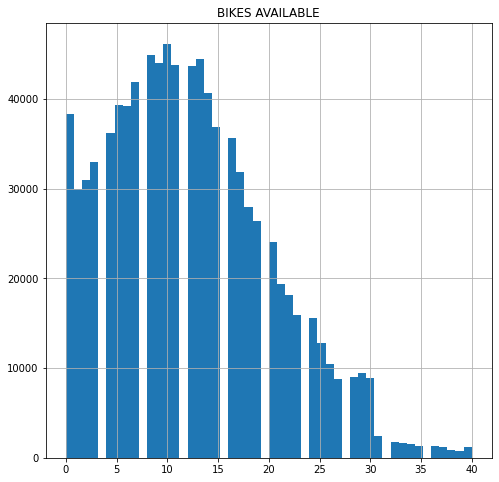

In [ ]:
dfana = df[['REGION','BIKES AVAILABLE']] #Graphic below shows distribution of Dublin Bikes availables per region 
print(dfana)

dfana.hist(bins=50, figsize=(8, 8))


Third section: Number of stations per regions

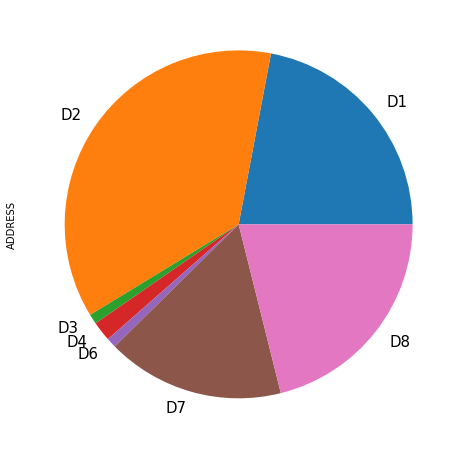

In [ ]:
#Graphic below represents quantity of Dublin Bike stations available per region
df_region_address = df[['REGION','ADDRESS']] #Created new dataset with the columns region per address
#The pie chart below is to represent number of address groupby regions. We use "nunique" function to count the unique values
df_region_address.groupby('REGION')['ADDRESS'].nunique().plot.pie(y='REGION', figsize=(8, 8), fontsize=15) 

Fourth section: Relationship between date time and availability of Dublin Bikes

In [ ]:
df['DATE'].unique()

In [ ]:
df['TIME'].unique()

In [ ]:
zoom.set_index('Date', inplace=True)

In [ ]:
df['BIKES AVAILABLE'].unique()

          BIKES AVAILABLE
TIME                     
00:00:00        12.590318
00:05:00        12.597935
00:10:00        12.616413
00:15:00        12.625608
00:20:00        12.630170


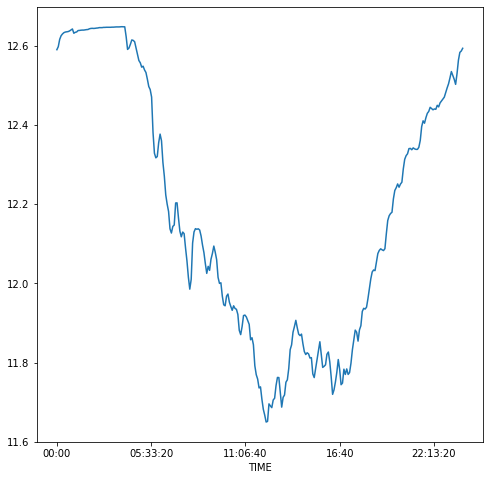

In [ ]:
#We will cross over time in a day and availability
#First we need to make sure that 'TIME' is converted from string to time.
%matplotlib inline
df1=df[['TIME','BIKES AVAILABLE']]
df1.set_index('TIME', inplace=True) 
groups = df1.groupby(['TIME']).mean()
print(groups.head())
groups['BIKES AVAILABLE'].plot.line(figsize=(8, 8))


            BIKES AVAILABLE
DATE                       
2021-01-07        12.064093
2021-02-07        12.121177
2021-03-07        12.343814
2021-04-07        12.404116
2021-05-07        12.093431


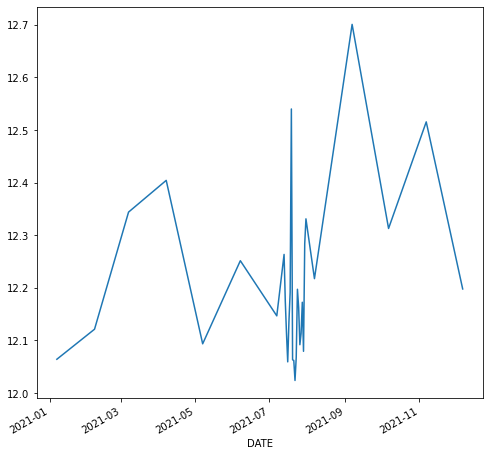

In [ ]:
#We will cross over time in a day and availability
#First we need to make sure that 'DATE' is converted from string to time.
%matplotlib inline
df1=df[['DATE','BIKES AVAILABLE']]
df1.set_index('DATE', inplace=True)
groups = df1.groupby(['DATE']).mean()
print(groups.head())
groups['BIKES AVAILABLE'].plot.line(figsize=(8, 8))


                 BIKES AVAILABLE
DAY OF THE WEEK                 
Monday                 12.215376
Tuesday                12.184093
Wednesday              12.191858
Thursday               12.118361
Friday                 12.126035


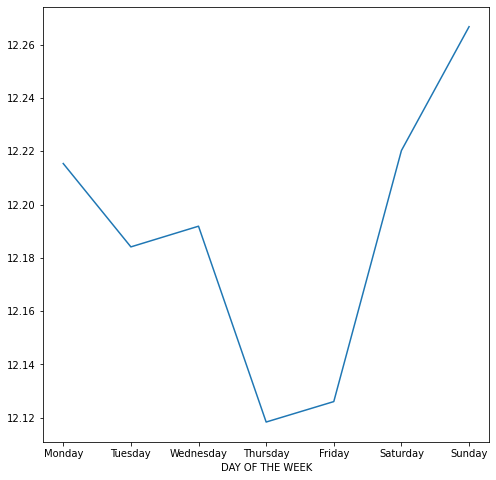

In [ ]:
#We will cross over time in a day and availability
#First we need to make sure that 'DATE' is converted from string to time.
%matplotlib inline
df1=df[['DAY OF THE WEEK','BIKES AVAILABLE']]
df1.set_index('DAY OF THE WEEK', inplace=True)
groups = df1.groupby(['DAY OF THE WEEK']).mean()
groups = groups.reindex(["Monday",'Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'])
print(groups.head())
groups['BIKES AVAILABLE'].plot.line(figsize=(8, 8))

Fifth Section: Regression

In [ ]:
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

#transform time in linux time(long) transform string into LabelEncoder and use prediction on bikes avalailable

df_day_time_avaliability = df[['REGION','DAY OF THE WEEK','TIME','BIKES AVAILABLE']]

searchData = df_day_time_avaliability[['TIME', 'DAY OF THE WEEK', 'REGION']]

df_day_time_avaliability.iloc[:, 0:3]  = df_day_time_avaliability.iloc[:, 0:3].apply(le.fit_transform)

print(df_day_time_avaliability['DAY OF THE WEEK'].corr(df_day_time_avaliability['BIKES AVAILABLE']))

print(df_day_time_avaliability['REGION'].corr(df_day_time_avaliability['BIKES AVAILABLE']))

X = df_day_time_avaliability[['TIME', 'DAY OF THE WEEK', 'REGION']]
y = df['BIKES AVAILABLE']

est = sm.OLS(y, X).fit()

est.summary()

search = ['D3', 'Monday', '23:00']

search_label= le.fit_transform(search)

print(search_label)



/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1851: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


0.0003766495664637621
-0.008889083512875479
[1 2 0]


In [ ]:
import datetime
toPredict = searchData.loc[(searchData['TIME'] == datetime.time(12, 00)) & (searchData['DAY OF THE WEEK'] == 'Monday' ) & (searchData['REGION'] == 'D1' )].head(1).index[0]
print(toPredict)

ypred=est.predict(X.loc[[toPredict]])

print('Prediction on avaliable bikes: ',ypred)


157392
Prediction on avaliable bikes:  157392    5.822054
dtype: float64


In [ ]:
import datetime
toPredict = searchData.loc[(searchData['TIME'] == datetime.time(12, 00)) & (searchData['DAY OF THE WEEK'] == 'Monday' ) & (searchData['REGION'] == 'D2' )].head(1).index[0]
print(toPredict)

ypred=est.predict(X.loc[[toPredict]])

print('Prediction on avaliable bikes: ',ypred)

157968
Prediction on avaliable bikes:  157968    6.502526
dtype: float64
